## Code 01 - Intro to Data Analysis



**Check your installation**

In [1]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 7.5.0
numpy: 1.16.4
scipy: 1.3.0
matplotlib: 3.1.0
scikit-learn: 0.21.2


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from scipy import stats

# Loading datasets

Three main types:
- **Packaged Data:** Small datasets packaged with scikit-learn, can be downloaded using the tools in: 
    sklearn.datasets.load_*
- **Downloadable Data:** Larger datasets are available for download, and scikit-learn includes tools which streamline this process. These tools can be found in: sklearn.datasets.fetch_*
- **Generated Data:** Several datasets can be generated from models based on a random seed. These are available at: sklearn.datasets.make_*

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)
print(iris.DESCR)

['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ==============

In [8]:
X, y = iris.data, iris.target

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Analyzing Sepal Length: overall, and for each species

In [10]:
sepal_length = X[:,0]

In [11]:
X.shape

(150, 4)

In [12]:
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [13]:
np.mean(sepal_length)

5.843333333333334

In [14]:
setosa_sepal_length = X[0:49,0]
versicolor_sepal_length = X[50:99,0]
virginica_sepal_length = X[100:149,0]

In [15]:
np.mean(setosa_sepal_length)

5.006122448979592

In [16]:
np.mean(versicolor_sepal_length)

5.940816326530613

In [17]:
np.mean(virginica_sepal_length)

6.60204081632653

In [18]:
np.median(sepal_length)

5.8

In [19]:
np.median(setosa_sepal_length)

5.0

In [20]:
np.median(versicolor_sepal_length)

5.9

In [21]:
np.median(virginica_sepal_length)

6.5

(0, 30)

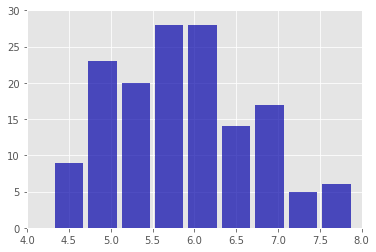

In [22]:
n, bins, patches = plt.hist(x=sepal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([4,8])
plt.ylim([0,30])

(0, 17)

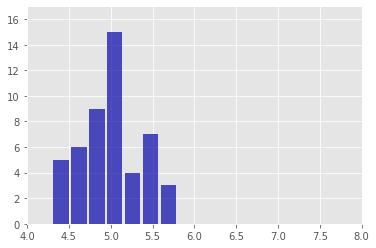

In [23]:
sn1, sbins1, spatches1 = plt.hist(x=setosa_sepal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([4,8])
plt.ylim([0,17])

(0, 17)

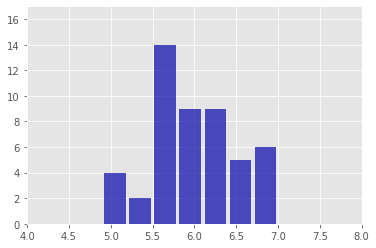

In [24]:
sn2, sbins2, spatches2 = plt.hist(x=versicolor_sepal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([4,8])
plt.ylim([0,17])

(0, 17)

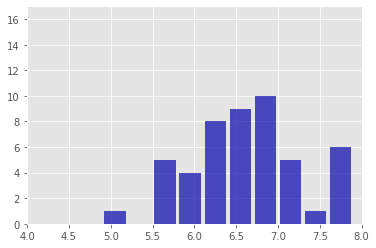

In [25]:
sn3, sbins3, spatches3 = plt.hist(x=virginica_sepal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([4,8])
plt.ylim([0,17])

### Analyzing Petal Lengths: overall, and for each species

In [26]:
petal_length = X[:,2]
setosa_petal_length = X[0:49,2]
versicolor_petal_length = X[50:99,2]
virginica_petal_length = X[100:149,2]

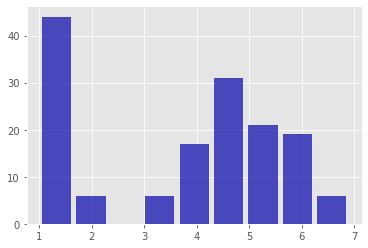

In [27]:
n, bins, patches = plt.hist(x=petal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 

(0, 16)

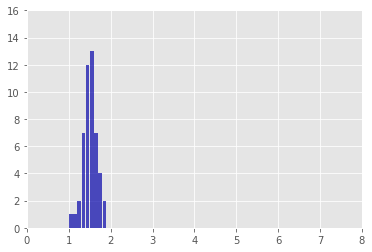

In [28]:
pn1, pbins1, ppatches1 = plt.hist(x=setosa_petal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([0,8])
plt.ylim([0,16])

(0, 16)

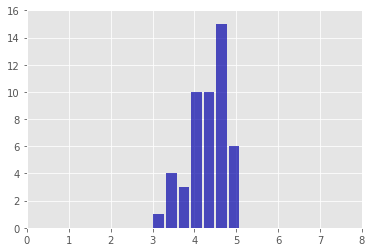

In [29]:
pn2, pbins2, ppatches2 = plt.hist(x=versicolor_petal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([0,8])
plt.ylim([0,16])

(0, 16)

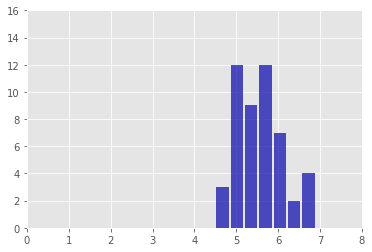

In [30]:
pn3, pbins3, ppatches3 = plt.hist(x=virginica_petal_length, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85) 
plt.xlim([0,8])
plt.ylim([0,16])

### Covariance and Correlation

In [31]:
np.cov(sepal_length,petal_length)

array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

In [32]:
np.corrcoef(sepal_length,petal_length)

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

## Hypothesis Testing: Nominal Data

### Example: Coin Toss -- Is My Coin Biased?

In [33]:
S = (54-50)**2/50 + (46-50)**2/50
S

0.64

In [36]:
from scipy.stats import chisquare 
chisquare([54, 46], f_exp=[50,50])

Power_divergenceResult(statistic=0.64, pvalue=0.4237107971667936)

### Example: Multiple Choice Questions

In [37]:
S = (20-25)**2/25 + (20-25)**2/25 + (25-25)**2/25 + (35-25)**2/25
S

6.0

In [38]:
chisquare([20, 20, 25, 35], f_exp=[25, 25, 25, 25])

Power_divergenceResult(statistic=6.0, pvalue=0.11161022509471268)

## Visualization: QQ plots, Scatter Plots

### QQ Plots

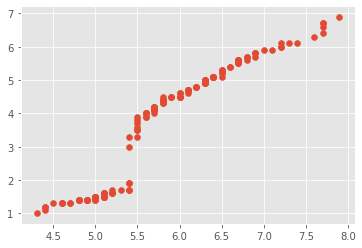

In [39]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

qqplot(sepal_length,petal_length)    

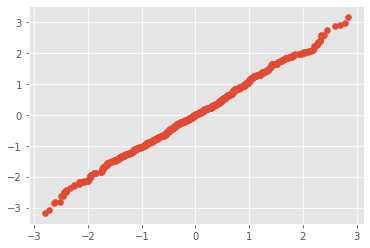

In [40]:
y0 = np.random.normal(0,1,1000)
x0 = np.random.normal(0,1, 1000)

qqplot(x0,y0)

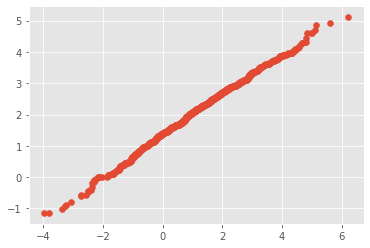

In [42]:
y1 = np.random.normal(2,1,1000)
x1 = np.random.normal(1, 1.5, 1000)

qqplot(x1,y1)

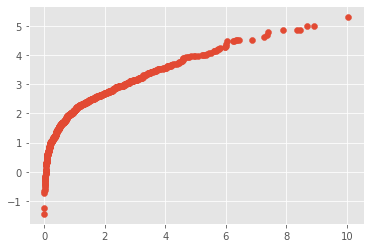

In [43]:
y2 = np.random.normal(2,1,1000)
x2 = np.random.gamma(1, 1.5, 1000)

qqplot(x2,y2)

### Scatter Plots

In [44]:
import os
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

In [47]:
# Convert to pandas dataframe 
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


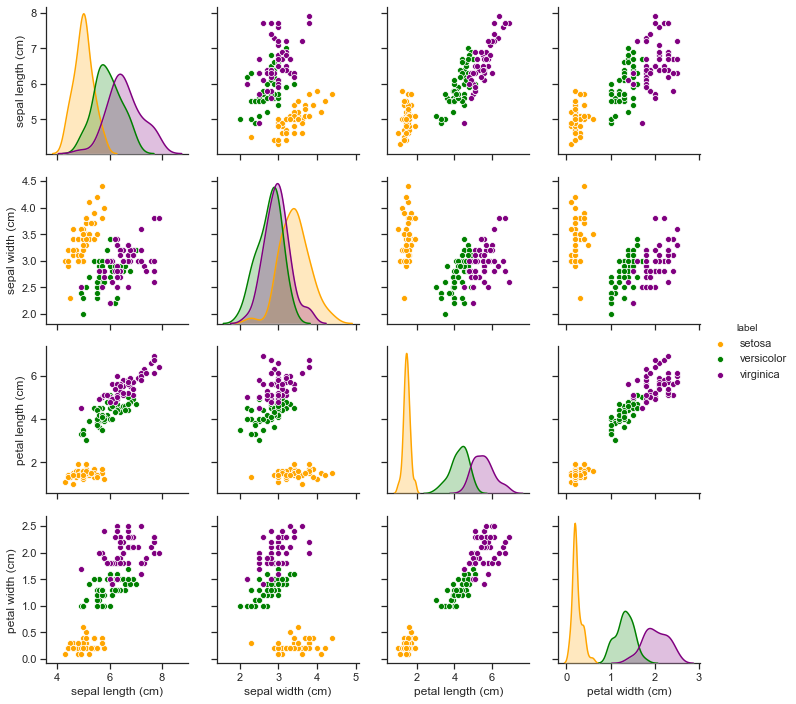

In [48]:
# we pick a color map  
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

g = sns.pairplot(df, vars = df.columns[0:4], hue="label", palette=palette)
plt.show()

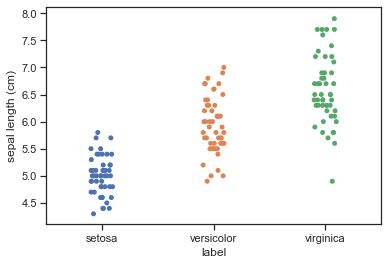

In [46]:
sns.stripplot(x="label", y="sepal length (cm)", data=df, jitter=True)
plt.show()

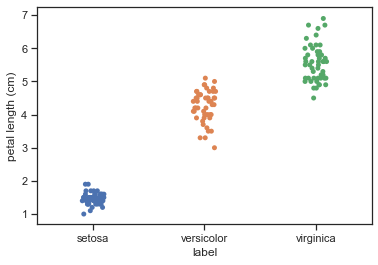

In [49]:
sns.stripplot(x="label", y="petal length (cm)", data=df, jitter=True)
plt.show()